In [1]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def __str__(self):
        return str(self.value)

In [2]:
def print_preorder(node):
    print(node.value, end=", ")

    if node.left != None:
        print_preorder(node.left)

    if node.right != None:
        print_preorder(node.right)

In [3]:
def add(node, value):
    if node == None:
        return Node(value)

    if node.value == value:
        raise Exception("Already added.")

    if value < node.value:
        node.left = add(node.left, value)
        return node

    if value > node.value:
        node.right = add(node.right, value)
        return node

In [4]:
def contains(node, value):
    if node == None:
        return False

    if node.value == value:
        return True

    if value < node.value:
        return contains(node.left, value)

    if value > node.value:
        return contains(node.right, value)

In [5]:
def delete_min(node):
    if node.left != None:
        (left_node, min_node) = delete_min(node.left)
        node.left = left_node
        return (node, min_node)

    return (node.right, node)

In [6]:
def delete(node, value):
    if node == None:
        raise Exception("Not added.")

    if node.value == value:
        if node.left != None and node.right != None:
            (right_node, min_node) = delete_min(node.right)
            node.right = right_node
            node.value = min_node.value
            return node
        if node.left != None:
            return node.left
        if node.right != None:
            return node.right
        return None

    if value < node.value:
        node.left = delete(node.left, value)
        return node

    if value > node.value:
        node.right = delete(node.right, value)
        return node

In [7]:
tree = Node(10)
node_l = 2
node_r = 13
tree.left = Node(node_l)
tree.right = Node(node_r)

node_ll = 1
node_lr = 5
tree.left.left = Node(node_ll)
tree.left.right = Node(node_lr)

node_lrl = 4
node_lrr = 7
tree.left.right.left = Node(node_lrl)
tree.left.right.right = Node(node_lrr)

node_rl = 12
node_rr = 20
tree.right.left = Node(node_rl)
tree.right.right = Node(node_rr)

node_rrl = 15
tree.right.right.left = Node(node_rrl)

add(tree, 3)
add(tree, 100)
delete(tree, 20)
delete(tree, 10)

print_preorder(tree)

12, 2, 1, 5, 4, 3, 7, 13, 100, 15, 

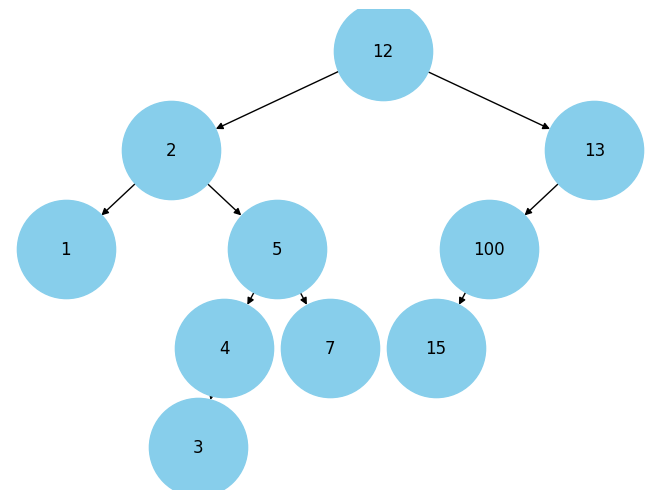

In [8]:
import matplotlib.pyplot as plt
import networkx as nx


def draw_tree(
    tree, parent_name, graph, pos=None, level=0, width=2.0, vert_gap=0.4, xcenter=0.5
):
    if pos is None:
        pos = {parent_name: (xcenter, 1 - level * vert_gap)}
    else:
        pos[parent_name] = (xcenter, 1 - level * vert_gap)

    neighbors = list(graph.neighbors(parent_name))
    if len(neighbors) != 0:
        dx = width / 2
        nextx = xcenter - width / 2 - dx / 2
        for neighbor in neighbors:
            nextx += dx
            pos = draw_tree(
                tree,
                neighbor,
                graph=graph,
                pos=pos,
                level=level + 1,
                width=dx,
                xcenter=nextx,
            )
    return pos


def build_networkx_tree(tree, graph, parent=None):
    if tree is not None:
        graph.add_node(tree.value)
        if parent:
            graph.add_edge(parent, tree.value)
        if tree.left:
            build_networkx_tree(tree.left, graph, tree.value)
        if tree.right:
            build_networkx_tree(tree.right, graph, tree.value)


# Build networkx graph
G = nx.DiGraph()
build_networkx_tree(tree, G)

# Draw the tree
pos = draw_tree(tree, tree.value, G)
labels = {k: k for k, v in pos.items()}
nx.draw(
    G, pos=pos, labels=labels, with_labels=True, node_size=5000, node_color="skyblue"
)
plt.show()